<a href="https://colab.research.google.com/github/dsmohiit/Machine-Learning-Repo/blob/main/Assumptions_of_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assumption 1:- Linearity

# Checking Linearity Using Scatter Plot

In [ ]:
x = 7 * np.random.rand(100, 1) - 2.8
y = 8 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2 * x + 0.2 * y + 0.1 * x * y + 2 + np.random.randn(100, 1)

df = pd.DataFrame()

df["x1"] = x.reshape(100)
df["x2"] = y.reshape(100)
df["y"] = z.reshape(100)

df.head()

,x1,x2,y
0,1.462908,-2.121916,7.126442
1,-2.224664,-1.007746,8.822739
2,-1.922489,-1.570200,9.059470
3,0.745637,-0.041669,0.473505
4,1.771239,-0.775637,5.717074


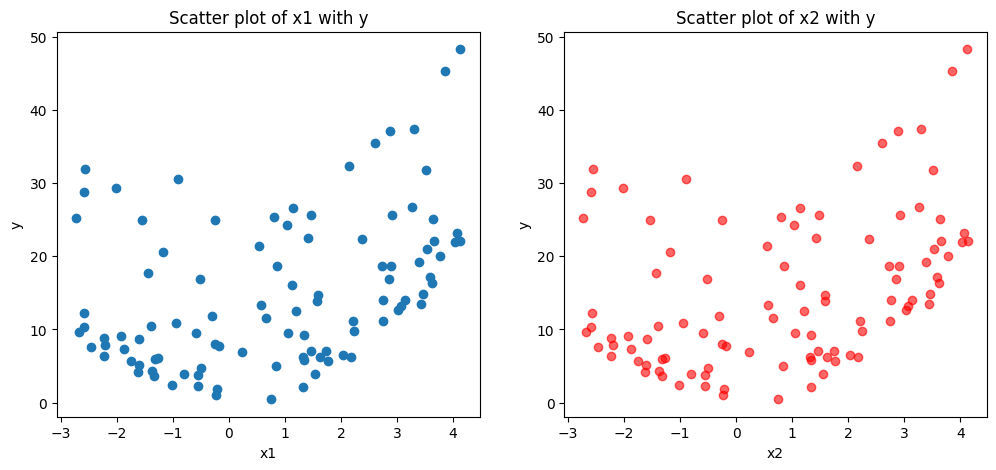

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (12, 5))

ax1.scatter(df["x1"], df["y"])
ax1.set_title("Scatter plot of x1 with y")
ax1.set_xlabel("x1")
ax1.set_ylabel("y")

ax2.scatter(df["x1"], df["y"], color= "red", alpha= 0.6)
ax2.set_title("Scatter plot of x2 with y")
ax2.set_xlabel("x2")
ax2.set_ylabel("y")

plt.show()

# Checking Linearity Using Residual Plot

In [ ]:
X = df[["x1", "x2"]]
y = df["y"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X, y)

LinearRegression()

In [ ]:
y_pred = model.predict(X)

In [ ]:
residual = y - y_pred

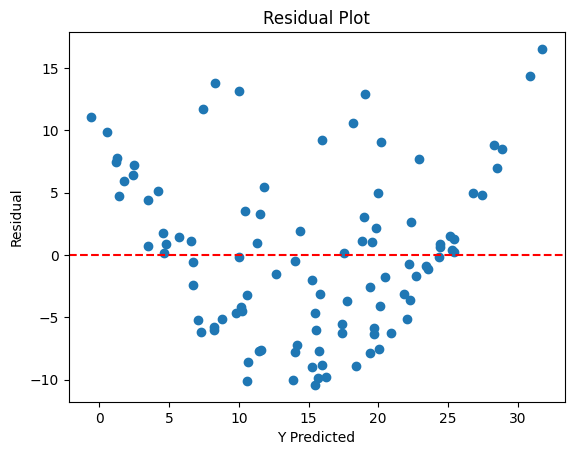

In [ ]:
# Residuals are making a pattern kind of parabola suggesting the absence of Linearity.
plt.scatter(y_pred, residual)
plt.axhline(y= 0, color= "red", linestyle= "dashed")
plt.xlabel("Y Predicted")
plt.ylabel("Residual")

plt.title("Residual Plot")
plt.show()

# Checking Linearity Using Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Significant improvement after adding a polynomial term, suggesting the absence of linearity.

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

# Fiting a linear model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_y_pred = lr_model.predict(x_test)

# Calculating metrics
lr_r2_score = r2_score(y_test, lr_y_pred)
lr_mse = mean_squared_error(y_test, lr_y_pred)

# Adding polynomial features
poly_feature = PolynomialFeatures(degree= 2)
x_train_poly = poly_feature.fit_transform(x_train)
x_test_poly = poly_feature.fit_transform(x_test)

# Fitting polynomial lr
poly_lr_model = LinearRegression()
poly_lr_model.fit(x_train_poly, y_train)
poly_y_pred = poly_lr_model.predict(x_test_poly)

# Calculating metrics
poly_r2_score = r2_score(y_test, poly_y_pred)
poly_mse = mean_squared_error(y_test, poly_y_pred)

print("LinearRegression R2 Score: ", lr_r2_score)
print("LinearRegression MSE: ", lr_mse)
print("-----------------------------------------------------------")
print("Polynomial LinearRegression R2 Score: ", poly_r2_score)
print("Polynomial LinearRegression MSE: ", poly_mse)

LinearRegression R2 Score:  0.6915052490278832
LinearRegression MSE:  42.83254676617276
-----------------------------------------------------------
Polynomial LinearRegression R2 Score:  0.9948210609440122
Polynomial LinearRegression MSE:  0.719062961738386


# Solving Non-Linearity

# Applying Transformation

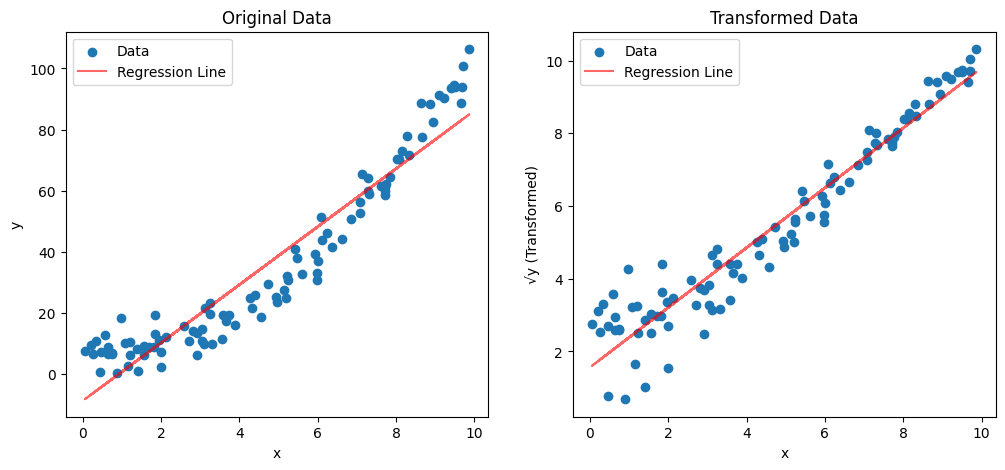

Original Linear Regression R² Score: 0.901
---------------------------------------------------------
Transformed Linear Regression R² Score: 0.929


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generating data
np.random.seed(42)
x = 10 * np.random.rand(100, 1)
y = x ** 2 + 5 + np.random.normal(0, 5, (100, 1))
y = np.abs(y)  # Ensuring y is positive for square root transformation

# Applying Square Root Transformation on y
y_sqrt = np.sqrt(y)

# Applying Linear Regression to Original Data
lr_model_original = LinearRegression()
lr_model_original.fit(x, y)
y_pred_original = lr_model_original.predict(x)

original_r2_score = r2_score(y, y_pred_original)

# Applying Linear Regression to Transformed Data
lr_model_transform = LinearRegression()
lr_model_transform.fit(x, y_sqrt)
y_pred_transform = lr_model_transform.predict(x)

transform_r2_score = r2_score(y_sqrt, y_pred_transform)

# Plotting graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Original Data
ax1.scatter(x, y, label="Data")
ax1.plot(x, y_pred_original, color="red", alpha=0.6, label="Regression Line")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Original Data")
ax1.legend()

# Transformed Data
ax2.scatter(x, y_sqrt, label="Data")
ax2.plot(x, y_pred_transform, color="red", alpha=0.6, label="Regression Line")
ax2.set_xlabel("x")
ax2.set_ylabel("√y (Transformed)")
ax2.set_title("Transformed Data")
ax2.legend()

plt.show()

# Printing results
print("Original Linear Regression R² Score:", round(original_r2_score, 3))
print("---------------------------------------------------------")
print("Transformed Linear Regression R² Score:", round(transform_r2_score, 3))

# Applying Polynomial Regression

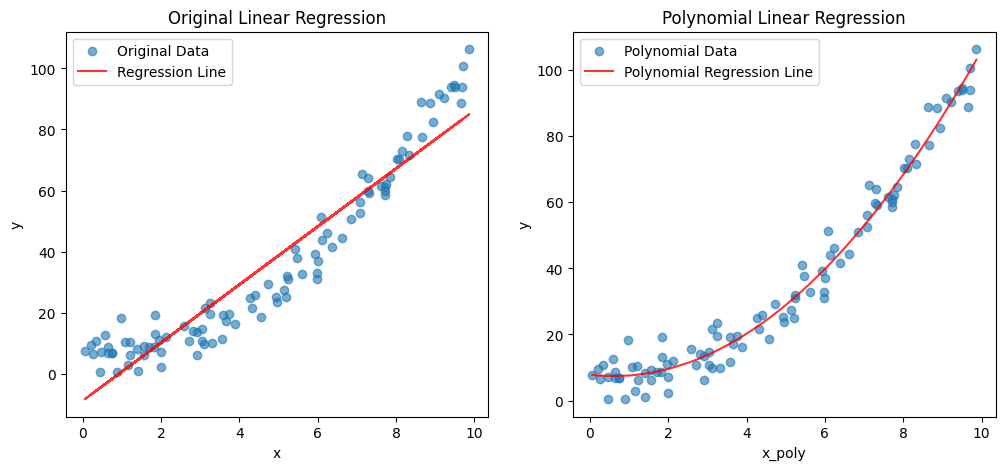

Original Linear Regression R² Score: 0.901
---------------------------------------------------------
Polynomial Linear Regression R² Score: 0.978


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generating data
np.random.seed(42)
x = 10 * np.random.rand(100, 1)
y = x ** 2 + 5 + np.random.normal(0, 5, (100, 1))
y = np.abs(y)  # Ensuring y is positive for square root transformation

# Applying Linear Regression to Original Data
lr_model_original = LinearRegression()
lr_model_original.fit(x, y)
y_pred_original = lr_model_original.predict(x)

original_r2_score = r2_score(y, y_pred_original)

# Adding polynomial features
poly_feature = PolynomialFeatures(degree= 2, include_bias= False)
x_poly = poly_feature.fit_transform(x)

# Fitting polynomial lr
poly_lr_model = LinearRegression()
poly_lr_model.fit(x_poly, y)
y_pred_poly = poly_lr_model.predict(x_poly)

poly_r2_score = r2_score(y, y_pred_poly)

# Plotting graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (12, 5))

# Original Data
ax1.scatter(x, y, label= "Original Data", alpha= 0.6)
ax1.plot(x, y_pred_original, color= "red", alpha= 0.8, label= "Regression Line")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Original Linear Regression")

ax1.legend()

# Polynomial Regression
ax2.scatter(x, y, label= "Polynomial Data", alpha= 0.6)
ax2.plot(sorted(x[:, 0]), y_pred_poly[np.argsort(x[:, 0])], color= "red", alpha= 0.8, label= "Polynomial Regression Line")
ax2.set_xlabel("x_poly")
ax2.set_ylabel("y")
ax2.set_title("Polynomial Linear Regression")

ax2.legend()
plt.show()

# Printing results
print("Original Linear Regression R² Score:", round(original_r2_score, 3))
print("---------------------------------------------------------")
print("Polynomial Linear Regression R² Score:", round(poly_r2_score, 3))

# Assumption 2 :- Normallity of Residual

# Checking Normallity of Residual Using Histogram and Q-Q Polt

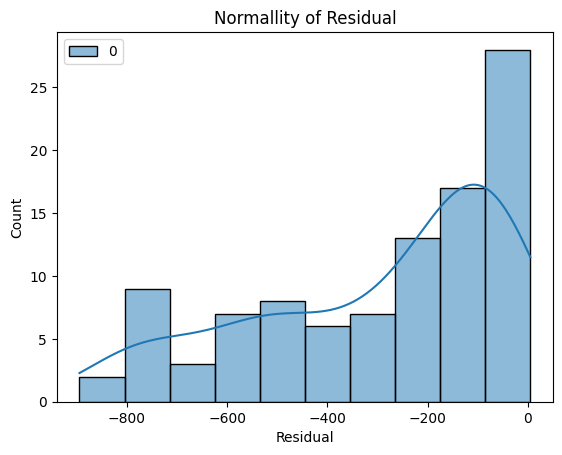

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generating data
np.random.seed(42)
x = 10 * np.random.rand(100, 1)
y = x ** 2 + 5 + np.random.normal(0, 5, (100, 1))
y = np.abs(y)  # Ensuring y is positive for square root transformation

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(y)
residual = y - y_pred

# Histogram
sns.histplot(residual, kde= True, bins= 10)
plt.title("Normallity of Residual")
plt.xlabel("Residual")
plt.show()

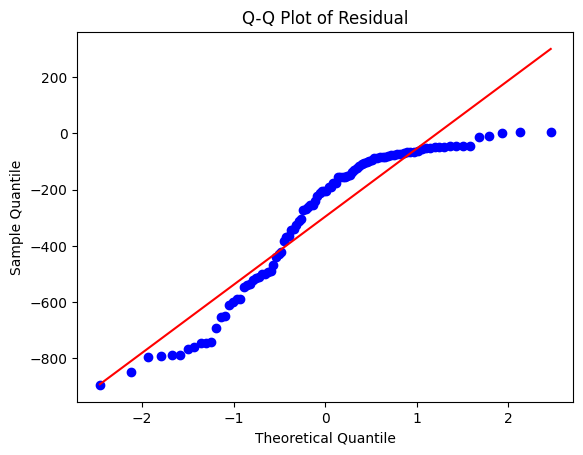

In [ ]:
# Q-Q Plot
from scipy import stats

stats.probplot(residual.flatten(), plot= plt)
plt.title("Q-Q Plot of Residual")
plt.xlabel("Theoretical Quantile")
plt.ylabel("Sample Quantile")
plt.show()